In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('ratings.csv')
data.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [8]:
data.shape

(100836, 6)

In [5]:
movie_titles_genre = pd.read_csv("movies.csv")
movie_titles_genre.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [9]:
movie_titles_genre.shape

(9742, 3)

In [6]:
data = data.merge(movie_titles_genre,on='movieId', how='left')
data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


In [19]:
data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
#find out the average rating for each movie in the dataset
Average_ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
Average_ratings.head(10)

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
'Tis the Season for Love (2015),1.500000
"'burbs, The (1989)",3.176471
'night Mother (1986),3.000000
(500) Days of Summer (2009),3.666667


In [10]:
# let's find out total number of ratings for each movie
Average_ratings['Total Ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
Average_ratings.head(10)

,rating,Total Ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


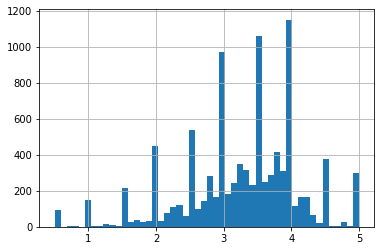

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
Average_ratings['rating'].hist(bins=50)

In [ ]:
# We can see that most of the movies are rated between 2.5 and 4

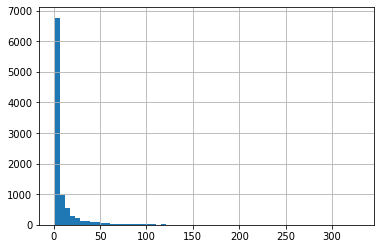

In [22]:
#let’s visualize the number_of_ratings column in as similar manner.
Average_ratings['Total Ratings'].hist(bins=60)

In [ ]:
# from the above histogram it is clear that most movies have few ratings

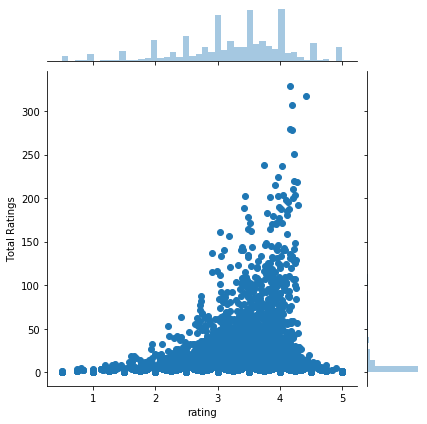

In [24]:
# Let’s now check the relationship between the rating of a movie and the number of ratings. 
# We do this by plotting a scatter plot using seaborn. Seaborn enables us to do this using the jointplot() function.
import seaborn as sns
sns.jointplot(x='rating', y='Total Ratings', data=Average_ratings)

In [11]:
# Building The Recommender
# calculate the correlation
movie_user = data.pivot_table(index='userId',columns='title',values='rating')
movie_user.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [14]:
# Now we need to select a movie to test our recommender system. Choose any movie title from the data. Here, I chose 
# Toy Story (1995).
# To find the correlation value for the movie with all other movies in the data we will pass all the ratings of the 
# picked movie to the corrwith method of the Pandas Dataframe. The method computes the pairwise correlation between 
# rows or columns of a DataFrame with rows or columns of Series or DataFrame. 
correlations = movie_user.corrwith(movie_user['Toy Story (1995)'])
correlations.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                         0.240563
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.353833
*batteries not included (1987)            -0.427425
dtype: float64

In [15]:
# Now we will remove all the empty values and merge the total ratings to the correlation table.
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])
recommendation.head(10)

,Correlation,Total Ratings
title,,
"'burbs, The (1989)",0.240563,17
(500) Days of Summer (2009),0.353833,42
*batteries not included (1987),-0.427425,7
10 Cent Pistol (2015),1.000000,2
10 Cloverfield Lane (2016),-0.285732,14
10 Items or Less (2006),-1.000000,3
10 Things I Hate About You (1999),0.322741,54
"10,000 BC (2008)",-0.251279,17
101 Dalmatians (1996),0.580479,47


In [17]:
# Testing The Recommendation System 
# Let’s filter all the movies with a correlation value to Toy Story (1995) and with at least 100 ratings.
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()

#Let’s also merge the movies dataset for verifying the recommendations.

recc = recc.merge(movie_titles_genre,on='title', how='left')
recc.head(10)

,title,Correlation,Total Ratings,movieId,genres
0,Toy Story (1995),1.000000,215,1,Adventure|Animation|Children|Comedy|Fantasy
1,"Incredibles, The (2004)",0.643301,125,8961,Action|Adventure|Animation|Children|Comedy
2,Finding Nemo (2003),0.618701,141,6377,Adventure|Animation|Children|Comedy
3,Aladdin (1992),0.611892,183,588,Adventure|Animation|Children|Comedy|Musical
4,"Monsters, Inc. (2001)",0.490231,132,4886,Adventure|Animation|Children|Comedy|Fantasy
5,Mrs. Doubtfire (1993),0.446261,144,500,Comedy|Drama
6,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",0.438237,120,4973,Comedy|Romance
7,American Pie (1999),0.420117,103,2706,Comedy|Romance
8,Die Hard: With a Vengeance (1995),0.410939,144,165,Action|Crime|Thriller
9,E.T. the Extra-Terrestrial (1982),0.409216,122,1097,Children|Drama|Sci-Fi


In [ ]:
# We can see that the top recommendations are pretty good. The movie that has the highest/full correlation to Toy Story 
# is Toy Story itself. The movies such as The Incredibles, Finding Nemo and Alladin show high correlation with Toy Story.